# Q1. 寫一個函式，抓取 Google Finance 的股價歷史資料

In [1]:
import requests
import csv
import pandas as pd
import pandas_datareader as web
from datetime import datetime
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
def vay_Datareader(Symbol,start,end = str(datetime.now())[:10]):
    #如果不輸入結束時間，自動設定為當天日期
    
    url = 'http://finance.google.com/finance/historical'

    params = {}
    params['q'] = Symbol
    params['startdate'] = start
    params['enddate'] = end
    params['output'] = 'csv'

    r = requests.get(url, params= params)
    lines = r.text.split('\n')
    datas = [line.split(",") for line in lines]
    df = pd.DataFrame(datas[1:-1],columns=datas[0])
    
    return df

In [3]:
df = vay_Datareader('TSLA','2013-01-01','2016-02-02')
df.head()

,Date,Open,High,Low,Close,Volume
0,2-Feb-16,192.42,193.12,180.23,182.78,5762855
1,1-Feb-16,188.76,199.52,182.75,196.94,5293766
2,29-Jan-16,189.95,193.74,188.08,191.20,2841003
3,28-Jan-16,190.79,191.28,182.41,189.70,4581652
4,27-Jan-16,192.38,193.26,185.77,188.07,3565378


In [4]:
df1 = vay_Datareader('TSLA','2013-01-01')
df1.head()

,Date,Open,High,Low,Close,Volume
0,6-Dec-17,300.10,313.39,300.00,313.26,7195341
1,5-Dec-17,302.00,308.00,301.00,303.70,4646520
2,4-Dec-17,306.50,308.26,300.61,305.20,5835140
3,1-Dec-17,305.44,310.32,305.05,306.53,4292868
4,30-Nov-17,308.56,310.70,304.54,308.85,4351587


# Q2. 抓取台股歷史資料，並繪製價量圖形

In [5]:
df = web.DataReader('2330.tw','yahoo',start='2016-01-01')

In [6]:
df.dropna(inplace= True)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,143.0,143.5,139.0,139.5,129.905670,39169000.0
2016-01-05,139.0,140.0,137.0,138.0,128.508820,46381000.0
2016-01-06,138.0,138.0,135.0,135.5,126.180771,53617000.0
2016-01-07,134.5,135.0,130.5,133.0,123.852715,62539000.0
2016-01-08,132.0,135.0,132.0,134.0,124.783943,50123000.0


In [8]:
trace1 = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)

trace2 = go.Bar(
            x=df.index,
            y=df.Volume
    )

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(title='台積電價量關係')
py.iplot(fig, filename='台積電價量關係')



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



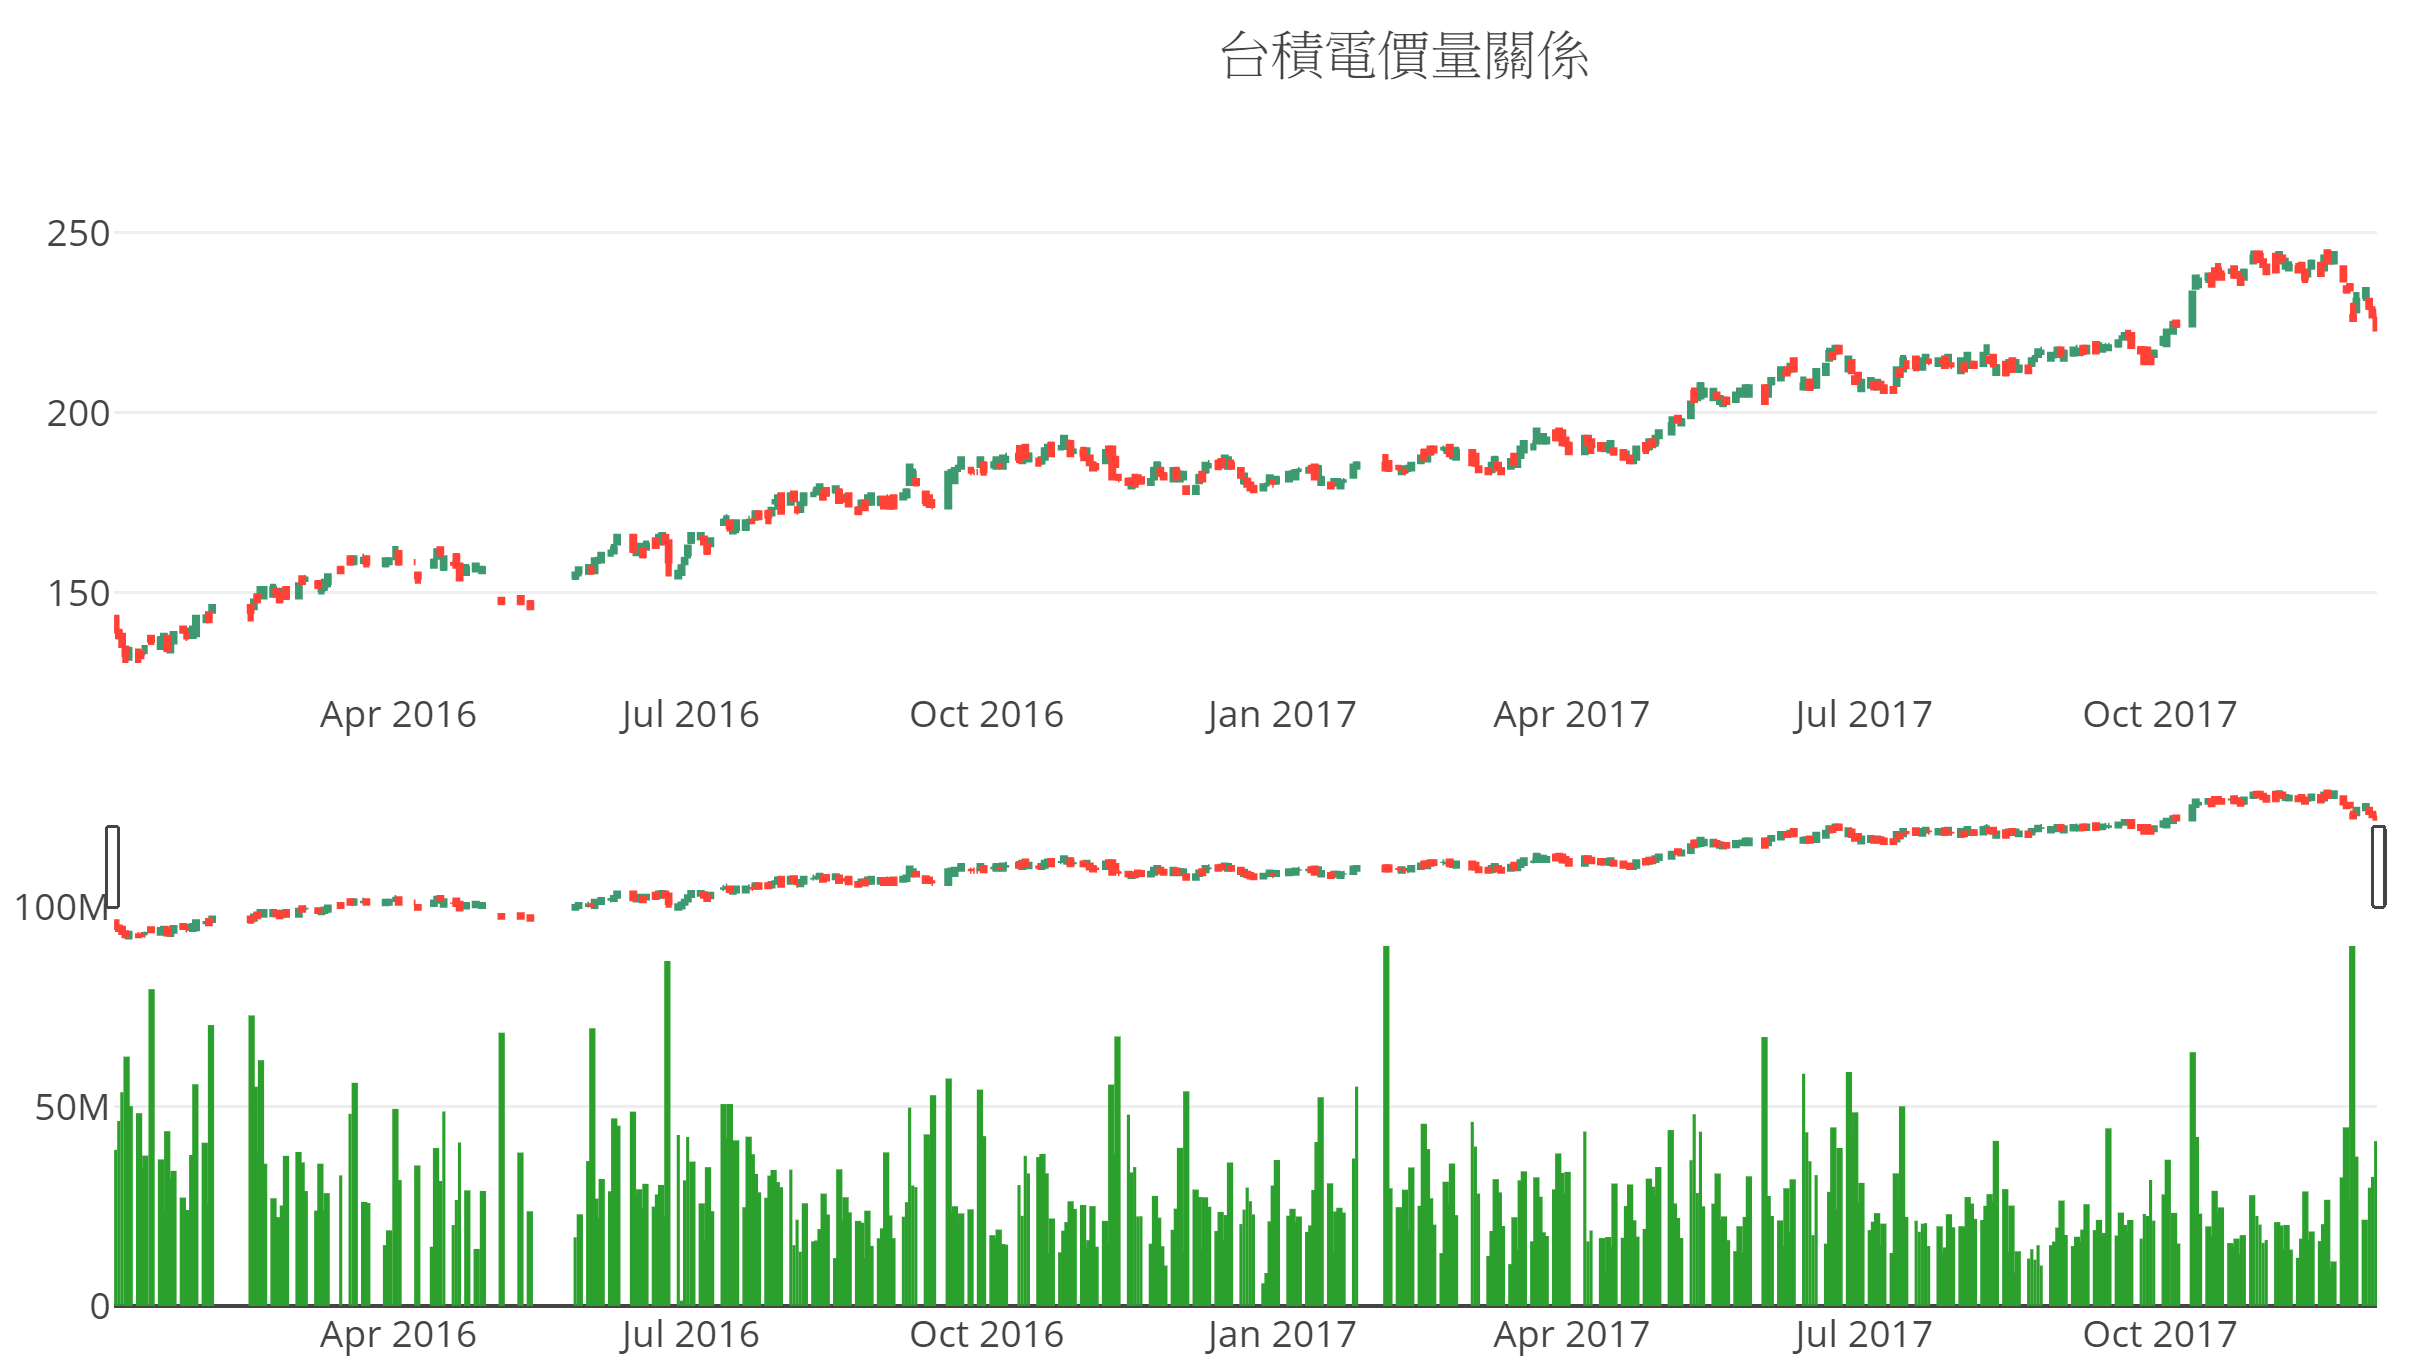

### ploty 上傳圖會不見，所以貼上來給老師看